# Exercises for EBT617E - Week 2

In [18]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [49]:
# kz in [-pi,pi]
def ϵkG(kz,n):
    G = 2*np.pi*n
    return (G+kz)**2

In [20]:
# number of bands is 2*nmax+1
nmax = 10
dB = 2*nmax+1

# number of points in the Brillouin zone
Nkz = 64

kkz, dkz = np.linspace(-np.pi,np.pi,Nkz,endpoint=False,retstep=True)

In [72]:
V0 = 10.

FCoeffs = np.zeros(3)
FCoeffs[0] = -V0/2 
FCoeffs[1] = 0
FCoeffs[2] = -V0/2

In [73]:
# real-Fourier space transform

# real space mesh
Nz = 101
zmax = 1
zz = np.linspace(-zmax,zmax,Nz,endpoint=True)

nn = np.arange(-1,1+1)

expqnz= np.exp(1j*np.pi*np.outer(zz,nn))

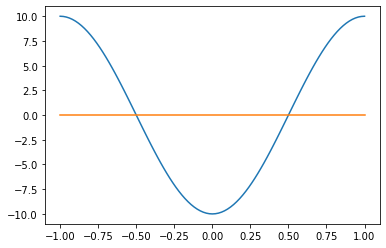

In [74]:
# plot the periodic potential using Fourier coefficients
Vz = expqnz@FCoeffs
plt.plot(zz,Vz.real)
plt.plot(zz,Vz.imag)

In [75]:
def FMat(FCoeffs, nmax):
    FCoeffs0 = FCoeffs
    dB = 2*nmax+1
    MM = np.zeros([dB,dB])
    dM = len(FCoeffs)//2+1
    for iFc,Fc in enumerate(FCoeffs0):
        MM+=np.diag([Fc]*(dB-np.abs(-dM+iFc+1)),-dM+iFc+1)
    return MM # +MM.T

def Hband(nmax,kz,FCoeffs):
    nn = np.arange(-nmax,nmax+1)
    HH = np.diag(ϵkG(kz,nn))
    HH+= FMat(FCoeffs, nmax)
    return HH

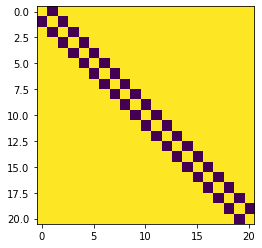

In [76]:
plt.imshow(FMat(FCoeffs, nmax))

In [77]:
kz=0
Hb = Hband(nmax,kz,FCoeffs)

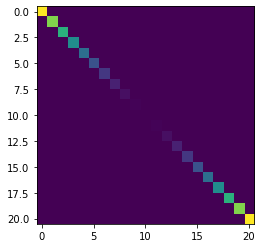

In [78]:
plt.imshow(Hb)

In [79]:
Ebands=[]
for kz in kkz:
    Hb = Hband(nmax,kz,FCoeffs)
    ee, uu = np.linalg.eigh(Hb)
    Ebands.append(ee)
    
Ebands=np.array(Ebands)

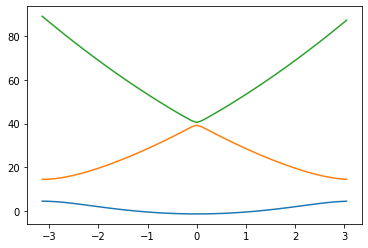

In [80]:
# plot the first two bands
for ni,n in enumerate(nn[:3]):
    plt.plot(kkz,Ebands[:,ni]);

In [83]:
# real-Fourier space transform

# real space mesh
Nz = 101
zmax = 1
zz = np.linspace(-zmax,zmax,Nz,endpoint=True)

nn = np.arange(-nmax,nmax+1)

expqnz= np.exp(1j*np.pi*np.outer(zz,nn))

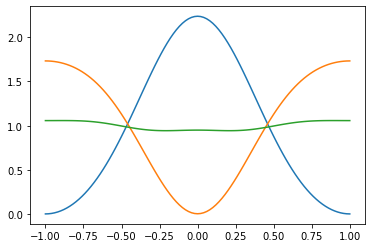

In [94]:
# plot the real space wave function for an eigenstate

for iz in range(3):
    uz = expqnz@uu[:,iz]
    plt.plot(zz,np.abs(uz)**2)